In [ ]:
! pip install matplotlib

In [6]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
from quickdraw import QuickDrawData
import keras
from keras.models import Sequential
from keras.layers import Input, Dense,Conv1D,MaxPooling1D,LSTM,TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.utils import Sequence
from sklearn import preprocessing
import pickle 
import matplotlib.pyplot as plt

In [7]:
qd = QuickDrawData()

In [8]:
from quickdraw import QuickDrawDataGroup
anvils = QuickDrawDataGroup("pizza")
print(anvils.drawing_count)
print(anvils.get_drawing(1).image_data)
print(anvils.get_drawing(1).strokes)
print(anvils.get_drawing(1).no_of_strokes)

loading pizza drawings
load complete
1000
[((8, 0, 112, 219), (8, 142, 129, 122)), ((20, 31, 120, 171, 223, 233), (0, 3, 42, 70, 93, 102)), ((206, 248), (123, 114)), ((226, 229, 255), (89, 95, 112)), ((39, 36, 39, 42), (8, 113, 131, 134)), ((71, 70, 73, 82, 83, 76, 69, 63, 64, 70, 80, 84, 83, 81, 75, 71, 70, 73, 80, 84, 85, 79, 76, 79, 83), (79, 109, 112, 112, 93, 85, 84, 95, 109, 116, 113, 95, 81, 77, 78, 85, 113, 118, 119, 112, 92, 83, 109, 112, 107)), ((131, 125, 121, 123, 128, 131, 132, 129, 135, 136, 131, 126, 125, 131), (74, 70, 78, 87, 88, 84, 69, 89, 94, 76, 74, 82, 98, 103)), ((201, 198, 203, 207, 208, 207, 203, 196, 195, 197, 200), (95, 117, 116, 109, 97, 90, 88, 98, 112, 116, 102)), ((54, 56, 59, 59, 56, 56, 62), (38, 46, 45, 38, 37, 44, 47)), ((111, 115, 122, 123, 141), (109, 115, 117, 108, 103)), ((169, 164), (81, 94))]
[[(8, 8), (0, 142), (112, 129), (219, 122)], [(20, 0), (31, 3), (120, 42), (171, 70), (223, 93), (233, 102)], [(206, 123), (248, 114)], [(226, 89), (229, 9

In [9]:

def draw_img(img):
    image = Image.new("RGB", (255,255), color=(255,255,255))
    drawing = ImageDraw.Draw(image)
    for stroke in img:
        print(stroke)
        for coordinate in range(len(stroke[0])-1):
            x1 = stroke[0][coordinate]
            y1 = stroke[1][coordinate]
            x2 = stroke[0][coordinate+1]
            y2 = stroke[1][coordinate+1]
            drawing.line((x1,y1,x2,y2), fill=(0,0,0), width=2)
    image.show()

In [47]:
def get_data(lables):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for lable in lables:
        imgs = QuickDrawDataGroup(str(lable))
        for i in range(imgs.drawing_count):
            img = imgs.get_drawing(i)
            print(img.image_data)
            print("---------")
            print(img.name)
            if i<800:
                x_train.append(img.image_data)
                y_train.append(img.name)
            else:
                x_test.append(img.image_data)
                y_test.append(img.name)
    x_train = np.array(x_train, dtype="object")
    y_train = np.array(y_train,dtype="object")
    x_test = np.array(x_test,dtype="object")
    y_test = np.array(y_test,dtype="object")
    
    return x_train ,y_train ,x_test ,y_test;

def normalize_data(x,y,le):
    temp_y=[]
    for i in range(len(x)):
        temp = []
        dx=[]
        dy=[]
        dt=[]
        dl=[]
        for j in range(len(x[i])): 
#             scaler = MinMaxScaler()
#             norm = np.array(x[i][j])            
#             scaler.fit(norm.T)
#             norm = np.array(scaler.transform(norm.T))
#             x[i][j] = norm.T
            for k in range(len(x[i][j][0])-1):
                x1 = x[i][j][0][k]
                y1 = x[i][j][1][k]
                x2 = x[i][j][0][k+1]
                y2 = x[i][j][1][k+1]
                del_x = x2-x1
                del_y = y2-y1
#                 enc = le.transform([y[i]])
#                 enc = to_categorical(enc, num_classes=len(drawing_lable))
#                 dl.append(enc[0])
                
                if k==len(x[i][j][0])-2:
                    dx.append(del_x)
                    dy.append(del_y)
                    dt.append(1)

                else:
                    dx.append(del_x)
                    dy.append(del_y)
                    dt.append(0)        
                    
                    
        temp = np.array([dx,dy,dt]); 
#         print(dl)
        enc = le.transform([y[i]])
        enc = to_categorical(enc, num_classes=len(drawing_lable))
        dl.append(enc[0])
        temp_y.append(np.array(dl));
        x[i]= np.array([temp.T]);

#         x[i] = np.array(x[i])
    return x,np.array(temp_y);

In [48]:
drawing_lable = ['hat','pizza','cat','dolphin','cell phone']

le = preprocessing.LabelEncoder()
le.fit(drawing_lable)
onehot_drawing_lable = le.transform(drawing_lable)
print(onehot_drawing_lable)
onehot_drawing_lable = to_categorical(onehot_drawing_lable, num_classes=len(drawing_lable))
print(onehot_drawing_lable)

x_train , y_train,x_test , y_test = get_data(drawing_lable)


[3 4 0 2 1]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
loading hat drawings
load complete
[((134, 117, 95, 62, 42, 25, 14, 3, 0), (14, 5, 1, 0, 6, 16, 30, 54, 71)), ((140, 142), (14, 64)), ((0, 62, 139, 255), (72, 74, 66, 36))]
---------
hat
[((3, 98, 150, 223, 245, 255, 248, 223, 51, 0), (144, 127, 122, 123, 128, 135, 140, 143, 147, 153)), ((64, 63, 65, 104, 184, 196, 201, 204, 206), (127, 3, 1, 3, 0, 4, 11, 24, 118)), ((61, 112, 168, 196), (98, 106, 105, 101))]
---------
hat
[((0, 40, 110, 255), (70, 78, 82, 82)), ((101, 107, 108, 112, 184, 185, 178, 170, 168), (79, 42, 2, 0, 31, 35, 43, 63, 86)), ((189, 186), (159, 164))]
---------
hat
[((99, 110, 135, 160, 184, 205, 220, 231, 239), (73, 47, 13, 2, 2, 12, 31, 60, 114)), ((91, 35, 16, 4, 1, 3, 12, 46, 96, 118, 150, 176, 225, 230, 245), (70, 55, 58, 65, 75, 82, 89, 97, 102, 117, 133, 140, 140, 138, 123)), ((107, 158, 204, 255), (99, 96, 99, 128)), ((102, 69, 41, 24, 8, 0), (70, 57, 55, 5

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(4000,)
(4000,)
(1000,)
(1000,)


In [50]:
# draw imgs
draw_img(x_train[2990])

((69, 51, 34, 8, 1, 0, 4, 13, 40, 65, 87, 100, 108, 121, 138, 155, 214, 247, 255, 245, 225, 189, 226, 225, 212, 178, 127, 98, 84, 62, 53), (38, 39, 46, 63, 73, 82, 99, 107, 112, 105, 90, 76, 74, 74, 82, 84, 81, 72, 66, 58, 52, 48, 30, 25, 20, 15, 28, 31, 36, 37, 41))
((71, 83, 92, 102, 113), (35, 20, 0, 11, 31))


In [67]:
# print((x[0][0]))
# le.transform(['hat'])
# dsfsd= to_categorical(le.transform(['hat']), num_classes=len(drawing_lable))
# print(dsfsd[0])

In [51]:
print(x_train[0][0])

((134, 117, 95, 62, 42, 25, 14, 3, 0), (14, 5, 1, 0, 6, 16, 30, 54, 71))


In [52]:
x_train,y_train = normalize_data(x_train,y_train,le) 

In [53]:
x_test,y_test = normalize_data(x_test,y_test,le) 

In [54]:
print(x_train[0][0])

[[-17  -9   0]
 [-22  -4   0]
 [-33  -1   0]
 [-20   6   0]
 [-17  10   0]
 [-11  14   0]
 [-11  24   0]
 [ -3  17   1]
 [  2  50   1]
 [ 62   2   0]
 [ 77  -8   0]
 [116 -30   1]]


In [55]:
print(x_test[0].shape)

(1, 26, 3)


In [56]:
print(y_train[0][0])

[0. 0. 0. 1. 0.]


In [57]:
class DataGenerator(Sequence):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return int(self.X.shape[0])

    def __getitem__(self, index):    
        return self.X[index], np.array([self.Y[index][0]])

In [58]:
train = DataGenerator(x_train,y_train) 

In [59]:
a,b = train.__getitem__(200)
print(a.shape)
print(b.shape)

(1, 15, 3)
(1, 5)


In [60]:
def get_model():
    model = Sequential()
    model.add(Conv1D(32,2,input_shape=(None,3), activation='sigmoid'))    
#     model.add(Conv1D(64,2,activation='sigmoid'))
#     model.add(Conv1D(128,3,activation='sigmoid'))
    model.add(LSTM(64,activation='tanh',recurrent_activation='sigmoid', use_bias=True,return_sequences=True))
    model.add(LSTM(64,activation='tanh', recurrent_activation='sigmoid', use_bias=True))    
    model.add(Dense(len(drawing_lable),activation='softmax'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
    

In [61]:
model = get_model()

d:\system\miniconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, None, 32)       │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, None, 64)       │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,405 (228.14 KB)

 Trainable params: 58,405 (228.14 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
quality = model.fit(DataGenerator(x_train,y_train),validation_data=DataGenerator(x_test,y_test),validation_freq=1, epochs=20, verbose=1,shuffle=True)

Epoch 1/20


   6/4000 ━━━━━━━━━━━━━━━━━━━━ 1:53 28ms/step - accuracy: 0.1861 - loss: 0.1636    

d:\system\miniconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4000/4000 ━━━━━━━━━━━━━━━━━━━━ 86s 21ms/step - accuracy: 0.3528 - loss: 0.1465 - val_accuracy: 0.6360 - val_loss: 0.0995
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.6227 - loss: 0.0989 - val_accuracy: 0.7510 - val_loss: 0.0726
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.7380 - loss: 0.0716 - val_accuracy: 0.7850 - val_loss: 0.0601
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.7805 - loss: 0.0619 - val_accuracy: 0.8320 - val_loss: 0.0530
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.7948 - loss: 0.0579 - val_accuracy: 0.8410 - val_loss: 0.0462
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.8457 - loss: 0.0458 - val_accuracy: 0.8700 - val_loss: 0.0396
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.8531 - loss: 0.0455 - val_accuracy: 0.8550 - val_loss: 0.0430
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.8761 - loss: 0.03

In [63]:
ind = 500
pred = model.predict(x_test[ind])
# pred = np.mean(pred[0], axis=0)
print(pred)
print(y_test[ind][0])
result = np.where(pred[0] == np.amax(pred[0]))
le.inverse_transform(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
[[9.9721968e-01 9.5510652e-05 1.4878984e-03 9.2958135e-04 2.6734028e-04]]
[1. 0. 0. 0. 0.]


d:\system\miniconda\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['cat'], dtype='<U10')

In [64]:
class Model:  
  
  def __init__(self,le,model):
    self.le = le
    self.model = model
  


In [65]:
model = Model(le=le,model=model)

In [66]:
pickle.dump(model, open('model.pkl', 'wb'))

In [67]:
model  =  pickle.load(open('model.pkl', 'rb'))

In [69]:
model.model.evaluate(DataGenerator(x_test,y_test),verbose=1)

  51/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9004 - loss: 0.0386

d:\system\miniconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8796 - loss: 0.0384


[0.03435396030545235, 0.8920000195503235]

In [70]:
ans = model.model.predict(x_test[200])
# x_test[200].shape
ans

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


array([[7.1709102e-04, 6.5866532e-04, 2.5447814e-03, 9.9132815e-04,
        9.9508816e-01]], dtype=float32)

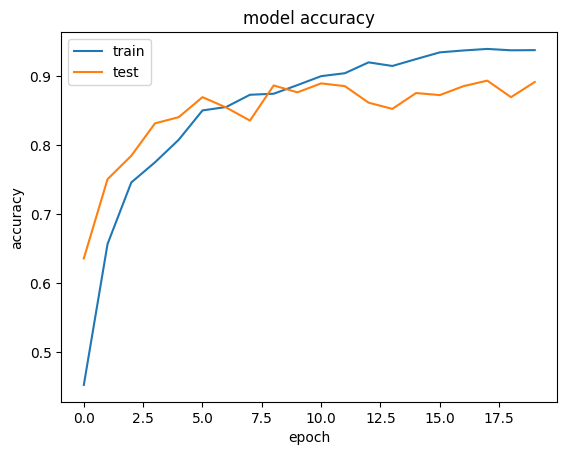

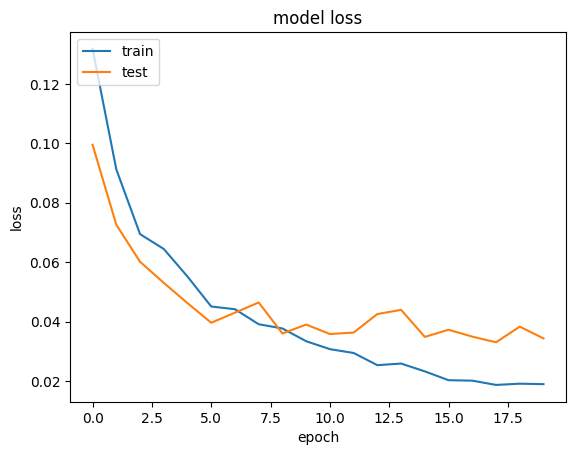

In [73]:
plt.plot(quality.history['accuracy'])
plt.plot(quality.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(quality.history['loss'])
plt.plot(quality.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
print(quality.history)

{'val_loss': [0.09590338506248372, 0.08476383533742046, 0.06032649917675553, 0.050194823869522225, 0.04868698344896029, 0.04949697341793115, 0.04342594178518408, 0.045374749686588174, 0.036007661611954046, 0.04312552746864816, 0.038756904428048626, 0.03606011000509369, 0.03675062476303208, 0.05899175655760837, 0.03575043942479343, 0.03832835327895397, 0.037276786173331675, 0.03574983982228842, 0.03487145777641856, 0.029837305216633827], 'val_acc': [0.649, 0.704, 0.793, 0.828, 0.826, 0.835, 0.856, 0.845, 0.881, 0.858, 0.869, 0.89, 0.88, 0.816, 0.875, 0.876, 0.879, 0.881, 0.882, 0.903], 'loss': [0.12895160891453633, 0.08942693999380753, 0.06906985414368637, 0.06301193528961038, 0.05169908840673673, 0.04538795260260062, 0.04005462037316416, 0.03788792656444625, 0.03568160941814503, 0.032334551464205497, 0.030120637645174277, 0.02785690167178496, 0.023969583080284688, 0.02325971307673222, 0.02332389493996521, 0.019161844970820213, 0.018522203268171798, 0.018931455125971067, 0.0174194283815